In [2]:
# ANALYST:    PATRICIA P. MAUMBA
# DUE DATE:   JULY 19, 2024
# Initial exploratory data analysis

In [3]:
# import pandas and load Titanic_data.csv
import pandas as pd

titanic = pd.read_csv("../data/Titanic_data.csv")
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  1309 non-null   int64  
 1   pclass    1309 non-null   int64  
 2   name      1309 non-null   object 
 3   sex       1309 non-null   object 
 4   age       1046 non-null   float64
 5   sibsp     1309 non-null   int64  
 6   parch     1309 non-null   int64  
 7   ticket    1309 non-null   object 
 8   fare      1308 non-null   float64
 9   cabin     295 non-null    object 
 10  embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


In [4]:
# View the data columns
titanic.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,1,"Hipkins, Mr. William Edward",male,55.0,0,0,680,50.0000,C39,S
1,0,1,"Nicholson, Mr. Arthur Ernest",male,64.0,0,0,693,26.0000,NaN,S
2,0,1,"Jones, Mr. Charles Cresson",male,46.0,0,0,694,26.0000,NaN,S
3,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
4,0,3,"Lockyer, Mr. Edward",male,NaN,0,0,1222,7.8792,NaN,S


In [5]:
# Describe the data
titanic.describe().T

,count,mean,std,min,25%,50%,75%,max
survived,1309.0,0.381971,0.486055,0.00,0.0000,0.0000,1.000,1.0000
pclass,1309.0,2.294882,0.837836,1.00,2.0000,3.0000,3.000,3.0000
age,1046.0,29.881138,14.413493,0.17,21.0000,28.0000,39.000,80.0000
sibsp,1309.0,0.498854,1.041658,0.00,0.0000,0.0000,1.000,8.0000
parch,1309.0,0.385027,0.865560,0.00,0.0000,0.0000,0.000,9.0000
fare,1308.0,33.295479,51.758668,0.00,7.8958,14.4542,31.275,512.3292


<Axes: title={'center': 'Embarked Variable Bar Chat'}, xlabel='embarked'>

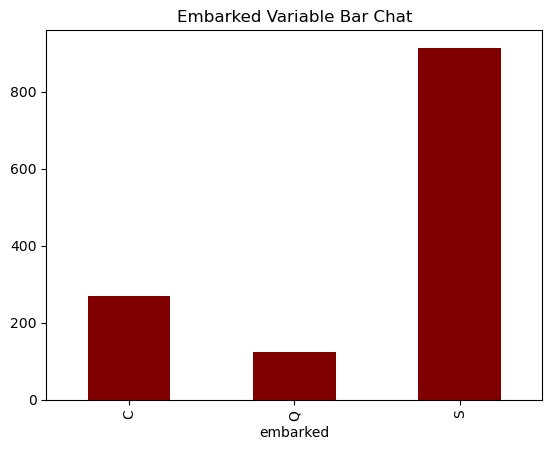

In [6]:
# Create a bar chart for the embarked column
titanic_bar = titanic['embarked'].value_counts().sort_index()
titanic_bar.plot.bar(color='maroon',
                    title='Embarked Variable Bar Chat')

In [7]:
# Find the number of passengers that survived
survivors = titanic[titanic['survived'] == 1]

# Find how many females survived
female_survivors = titanic[(titanic['sex']=='female') & (titanic['survived']==1)]

# Find how many females survivors were in 3rd class
female_survivors_3rdclass = titanic[(titanic['sex']=='female') & (titanic['pclass']==3) & (titanic['survived']==1)]

# Display results
print()
print(survivors.shape[0], 'Passengers Survived')
print(female_survivors.shape[0], 'Female passengers survived')
print(female_survivors_3rdclass.shape[0], 'Female Survivors Were in 3rd Class')


500 Passengers Survived
339 Female passengers survived
106 Female Survivors Were in 3rd Class


In [8]:
survivors = titanic[titanic['survived'] == 1]
print(survivors.shape[0], 'Passengers Survived')

500 Passengers Survived


In [9]:
# Find number of passengers that didnot have a sibling onboard
titanic_sib_spouse = titanic[titanic['sibsp'] == 0]
print(titanic_sib_spouse.shape[0], 'Passengers Didnot Have a Sibling or Spouse Onboard')

891 Passengers Didnot Have a Sibling or Spouse Onboard


In [10]:
passenger_with_family = titanic[(titanic['parch'] > 0) & (titanic['sibsp'] > 0)]
print(passenger_with_family.shape[0], 'Passengers Had Both a Parent or Child and a Sibling or Spouse On board')

206 Passengers Had Both a Parent or Child and a Sibling or Spouse On board


<Axes: >

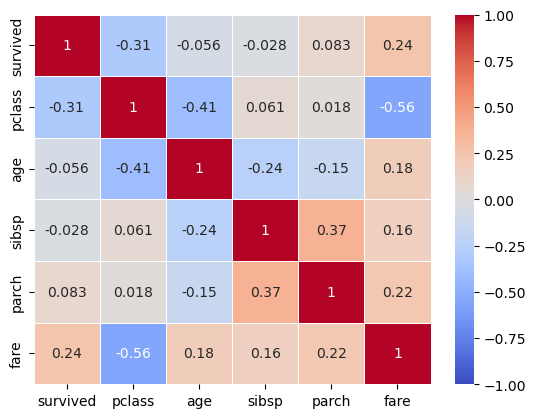

In [11]:
# Plotting a correlation matrix heatmap for Titanic data
import seaborn as sns
sns.heatmap(titanic.corr(numeric_only=True),
           vmin=-1,
           vmax=1,
           annot=True,
            cmap='coolwarm',
           linewidth=.5)


1. The correlation matrix shows a positive correlation between survival and fare which shows that passengers who paid higher fares had slightly higher chance of surviving.

2. The data also shows a strong negative correlation between fare and passenger class since higher classes mostly pay higher fares

In [10]:
# Lets create a subset for titanic data and drop columns
titanic_sub = titanic.drop(columns=['name', 'cabin', 'ticket'])
titanic_sub

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,1,male,55.0,0,0,50.0000,S
1,0,1,male,64.0,0,0,26.0000,S
2,0,1,male,46.0,0,0,26.0000,S
3,0,1,male,33.0,0,0,5.0000,S
4,0,3,male,NaN,0,0,7.8792,S
...,...,...,...,...,...,...,...,...
1304,0,1,male,46.0,1,0,61.1750,S
1305,1,1,female,47.0,1,0,61.1750,S
1306,0,2,male,30.0,0,0,10.5000,S
1307,0,1,male,70.0,1,1,71.0000,S
